# Importing libraries and reading CSV files

In [1]:
#conda install -c conda-forge pandas-profiling

In [2]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [3]:
train = pd.read_csv ('./Data/train.csv')
test = pd.read_csv ('./Data/test.csv')
spray = pd.read_csv ('./Data/spray.csv')

| Feature                | File  | Description                                                                                                 |
|------------------------|-------|-------------------------------------------------------------------------------------------------------------|
| Date                   | Train | date that the WNV test is performed                                                                         |
| Address                | Train | approximate address of the location of trap\. This is used to send to the GeoCoder\.                        |
| Species                | Train | the species of mosquitos                                                                                    |
| Block                  | Train | block number of address                                                                                     |
| Street                 | Train | street name                                                                                                 |
| Trap                   | Train | Id of the trap                                                                                              |
| AddressNumberAndStreet | Train | approximate address returned from GeoCoder                                                                  |
| Latitude, Longitude    | Train | Latitude and Longitude returned from GeoCoder                                                               |
| AddressAccuracy        | Train | accuracy returned from GeoCoder                                                                             |
| NumMosquitos           | Train | number of mosquitoes caught in this trap                                                                    |
| WnvPresent             | Train | whether West Nile Virus was present in these mosquitos\. 1 means WNV is present, and 0 means not present\.  |



# Train Dataset

In [4]:
train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [5]:
train.columns = train.columns.map(lambda x: x.lower())

In [6]:
train.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent'],
      dtype='object')

In [7]:
train.shape

(10506, 12)

In [8]:
train.dtypes

date                       object
address                    object
species                    object
block                       int64
street                     object
trap                       object
addressnumberandstreet     object
latitude                  float64
longitude                 float64
addressaccuracy             int64
nummosquitos                int64
wnvpresent                  int64
dtype: object

In [9]:
#pp.ProfileReport(train)

In [10]:
# duplicate rows 
train[train.duplicated()].shape

(813, 12)

In [11]:
train[train.duplicated()].index

Int64Index([   99,   295,   351,   353,   512,   531,   548,   587,   588,
              589,
            ...
             9902,  9969,  9975,  9976,  9992, 10013, 10102, 10124, 10262,
            10392],
           dtype='int64', length=813)

### Date

In [12]:
train.date.isnull().sum()

0

In [13]:
train['date']

0        2007-05-29
1        2007-05-29
2        2007-05-29
3        2007-05-29
4        2007-05-29
            ...    
10501    2013-09-26
10502    2013-09-26
10503    2013-09-26
10504    2013-09-26
10505    2013-09-26
Name: date, Length: 10506, dtype: object

In [14]:
train['date_split'] = train['date'].str.split('-')
train['date_split']

0        [2007, 05, 29]
1        [2007, 05, 29]
2        [2007, 05, 29]
3        [2007, 05, 29]
4        [2007, 05, 29]
              ...      
10501    [2013, 09, 26]
10502    [2013, 09, 26]
10503    [2013, 09, 26]
10504    [2013, 09, 26]
10505    [2013, 09, 26]
Name: date_split, Length: 10506, dtype: object

In [15]:
train['year'] = [y[0] for y in train['date_split']]
train['year']

0        2007
1        2007
2        2007
3        2007
4        2007
         ... 
10501    2013
10502    2013
10503    2013
10504    2013
10505    2013
Name: year, Length: 10506, dtype: object

In [16]:
train['month'] = [y[1] for y in train['date_split']]
train['month']

0        05
1        05
2        05
3        05
4        05
         ..
10501    09
10502    09
10503    09
10504    09
10505    09
Name: month, Length: 10506, dtype: object

In [17]:
train['day'] = [y[2] for y in train['date_split']]
train['day']

0        29
1        29
2        29
3        29
4        29
         ..
10501    26
10502    26
10503    26
10504    26
10505    26
Name: day, Length: 10506, dtype: object

In [18]:
train.drop(columns = 'date_split',inplace = True)

In [19]:
train.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'year', 'month', 'day'],
      dtype='object')

### Species

In [20]:
train.species.isnull().sum()

0

In [21]:
train['species'].value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: species, dtype: int64

In [22]:
train.groupby(by=['species'])['wnvpresent'].value_counts()

species                 wnvpresent
CULEX ERRATICUS         0                1
CULEX PIPIENS           0             2459
                        1              240
CULEX PIPIENS/RESTUANS  0             4490
                        1              262
CULEX RESTUANS          0             2691
                        1               49
CULEX SALINARIUS        0               86
CULEX TARSALIS          0                6
CULEX TERRITANS         0              222
Name: wnvpresent, dtype: int64

Since there are only 3 species with high value count in wnvpresent, we will merge the minority spicies into 'others'

In [23]:
train.species = train.species.map({'CULEX PIPIENS/RESTUANS': 'PIPIENS/RESTUANS',
                                   'CULEX RESTUANS': 'RESTUANS',
                                   'CULEX PIPIENS': 'PIPIENS',
                                   'CULEX TERRITANS': 'OTHER', 
                                   'CULEX SALINARIUS': 'OTHER',
                                   'CULEX TARSALIS': 'OTHER',
                                   'CULEX ERRATICUS': 'OTHER'})

In [24]:
train['species'].value_counts()

PIPIENS/RESTUANS    4752
RESTUANS            2740
PIPIENS             2699
OTHER                315
Name: species, dtype: int64

### Block

In [25]:
train.block.isnull().sum()

0

Decided to drop this column as it does not seem to be useful and informtive as it is well represented by latitude and longitude 

In [26]:
train.drop(columns = 'block',inplace = True)

### Address

In [27]:
train.address.isnull().sum()

0

Decided to drop this column as it does not seem to be useful and informtive as it is well represented by latitude and longitude 

In [28]:
train.drop(columns = 'address',inplace = True)

### Address Number and Street

In [29]:
train.addressnumberandstreet.isnull().sum()

0

Decided to drop this column as it does not seem to be useful and informtive as it is well represented by latitude and longitude 

In [30]:
train.drop(columns = 'addressnumberandstreet',inplace = True)

In [31]:
train.drop(columns = 'street',inplace = True)

### Address Accuracy

In [32]:
train.addressaccuracy.isnull().sum()

0

In [33]:
train.addressaccuracy.value_counts()

8    4628
9    3980
5    1807
3      91
Name: addressaccuracy, dtype: int64

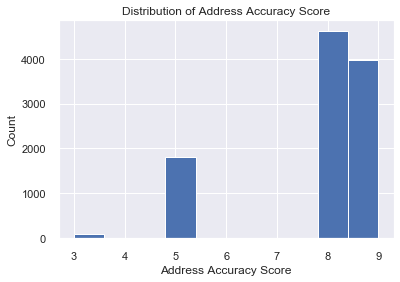

In [34]:
train.addressaccuracy.hist()
plt.title('Distribution of Address Accuracy Score')
plt.xlabel('Address Accuracy Score')
plt.ylabel('Count')
plt.show()

Decided to drop this column as it does not seem to be useful and informtive as it is well represented by latitude and longitude 

In [35]:
train.drop(columns = 'addressaccuracy',inplace = True)

In [36]:
train.columns

Index(['date', 'species', 'trap', 'latitude', 'longitude', 'nummosquitos',
       'wnvpresent', 'year', 'month', 'day'],
      dtype='object')

### No. of Mosquitos

In [37]:
train.nummosquitos.isnull().sum()

0

In [38]:
train.nummosquitos.unique()

array([ 1,  4,  2,  3,  5,  9,  7, 10,  8,  6, 19, 20, 25, 16, 11, 12, 28,
       18, 50, 35, 14, 22, 21, 37, 27, 13, 39, 29, 15, 17, 34, 26, 32, 47,
       44, 23, 46, 48, 42, 33, 45, 24, 41, 38, 40, 36, 43, 49, 30, 31])

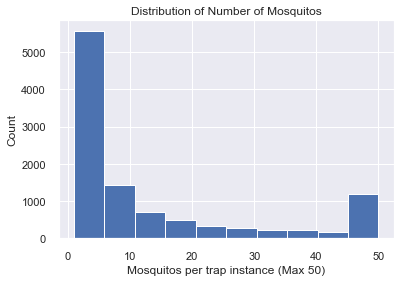

In [39]:
train.nummosquitos.hist()
plt.title('Distribution of Number of Mosquitos')
plt.xlabel('Mosquitos per trap instance (Max 50)')
plt.ylabel('Count')
plt.show()

In [40]:
train.columns

Index(['date', 'species', 'trap', 'latitude', 'longitude', 'nummosquitos',
       'wnvpresent', 'year', 'month', 'day'],
      dtype='object')

In [41]:
#merge total mosquito with train data
train = pd.merge(train, train.groupby(['date', 'trap', 'species','wnvpresent'], as_index=False)['nummosquitos'].sum(), 
                    how='left', on=['date', 'trap', 'species','wnvpresent'])

#rename column wich include total mosquito
#train.columns = ['date', 'species', 'trap','latitude', 'longitude','nummosquitos', 'wnvpresent', 'year', 'month', 'day', 'tot_mos_species']

In [42]:
train.columns = ['date', 'species', 'trap','latitude', 'longitude','nummosquitos', 'wnvpresent', 'year', 'month', 'day', 'tot_mos_species']

In [43]:
train.columns

Index(['date', 'species', 'trap', 'latitude', 'longitude', 'nummosquitos',
       'wnvpresent', 'year', 'month', 'day', 'tot_mos_species'],
      dtype='object')

In [44]:
train.shape

(10506, 11)

In [45]:
# dropping duplicated rows and only keeping the rows with the sum of mosquitoes. 
train = train[train.duplicated(subset=['date', 'trap', 'species','tot_mos_species','wnvpresent']) == False]

In [46]:
train.shape

(8596, 11)

### Trap

In [47]:
train.trap.isnull().sum()

0

In [48]:
train.trap.value_counts()

T900     181
T115     156
T135     153
T002     150
T151     144
        ... 
T078       6
T076       5
T094B      5
T237       3
T040       2
Name: trap, Length: 136, dtype: int64

In [49]:
train.trap.unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [50]:
#convert all satellite trap to have the same trap name as parent trap
trap_rename = lambda x: x[0:4] if len(x)==5 else x
train['trap'] = train['trap'].apply(trap_rename)

In [51]:
train.trap.unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

### Latitude

In [52]:
train.latitude.isnull().sum()

0

In [53]:
train['latitude'].unique()

array([41.95469 , 41.994991, 41.974089, 41.9216  , 41.891118, 41.867108,
       41.896282, 41.919343, 41.921965, 41.688324, 41.862292, 41.720848,
       41.731922, 41.891126, 41.999129, 42.01743 , 41.907645, 41.732984,
       41.981964, 41.944869, 42.011601, 41.94983 , 41.979243, 41.986921,
       41.801498, 41.906638, 41.723195, 41.868077, 41.869216, 41.662014,
       41.961743, 41.953067, 41.878114, 41.958271, 41.932094, 41.994469,
       42.006858, 41.916265, 41.846075, 41.918705, 41.682587, 41.725517,
       41.948167, 41.963976, 41.953705, 41.964242, 41.990284, 42.008314,
       41.991429, 41.843811, 41.921177, 41.852652, 41.857402, 41.868142,
       41.846283, 41.721474, 41.869107, 41.719059, 41.966987, 41.923738,
       41.970248, 42.010412, 41.89923 , 41.692555, 41.94016 , 41.903002,
       41.942114, 41.960616, 41.883284, 41.704336, 41.962728, 41.836644,
       41.837085, 41.911824, 41.823065, 41.801179, 41.800737, 41.778297,
       41.77166 , 41.759346, 41.768388, 41.797616, 

### Longitude

In [54]:
train.longitude.isnull().sum()

0

In [55]:
train['longitude'].unique()

array([-87.800991, -87.769279, -87.824812, -87.666455, -87.654491,
       -87.654224, -87.655232, -87.694259, -87.632085, -87.676709,
       -87.64886 , -87.666014, -87.677512, -87.61156 , -87.795585,
       -87.687769, -87.760886, -87.649642, -87.812827, -87.832763,
       -87.811506, -87.698457, -87.750938, -87.689778, -87.763416,
       -87.701431, -87.64997 , -87.666901, -87.627561, -87.724608,
       -87.76007 , -87.776792, -87.629798, -87.702575, -87.700117,
       -87.667736, -87.675919, -87.800515, -87.716277, -87.752329,
       -87.707973, -87.614258, -87.730698, -87.69181 , -87.733974,
       -87.757639, -87.797127, -87.777921, -87.747113, -87.686763,
       -87.79518 , -87.719887, -87.694991, -87.696269, -87.656913,
       -87.648064, -87.696293, -87.675088, -87.674677, -87.785288,
       -87.787992, -87.66214 , -87.716788, -87.598865, -87.794896,
       -87.688267, -87.776385, -87.777189, -87.705085, -87.703736,
       -87.748367, -87.677737, -87.729384, -87.726737, -87.678

### WNV Presence

In [56]:
train.wnvpresent.isnull().sum()

0

In [57]:
train.wnvpresent.value_counts()

0    8139
1     457
Name: wnvpresent, dtype: int64

In [58]:
train.wnvpresent.mean()

0.05316426244765007

#### Relationship on location vs wnvpresent 

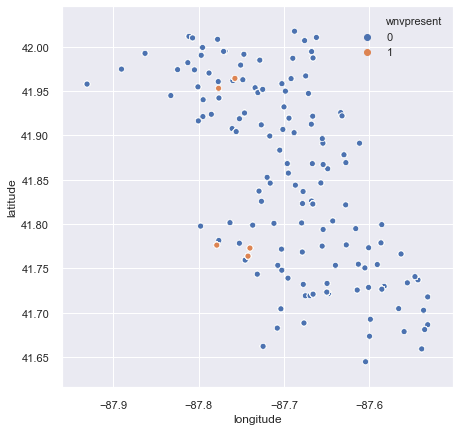

In [59]:
x = train['longitude']
y = train['latitude']

plt.figure(figsize=(7,7))
sns.scatterplot(x,y,hue=train['wnvpresent'])

plt.show()

### Relationship between wnvpresent vs species vs tot_mos_species 

In [60]:
train.groupby(by='species')['wnvpresent'].value_counts()

species           wnvpresent
OTHER             0              292
PIPIENS           0             1812
                  1              184
PIPIENS/RESTUANS  0             3674
                  1              225
RESTUANS          0             2361
                  1               48
Name: wnvpresent, dtype: int64

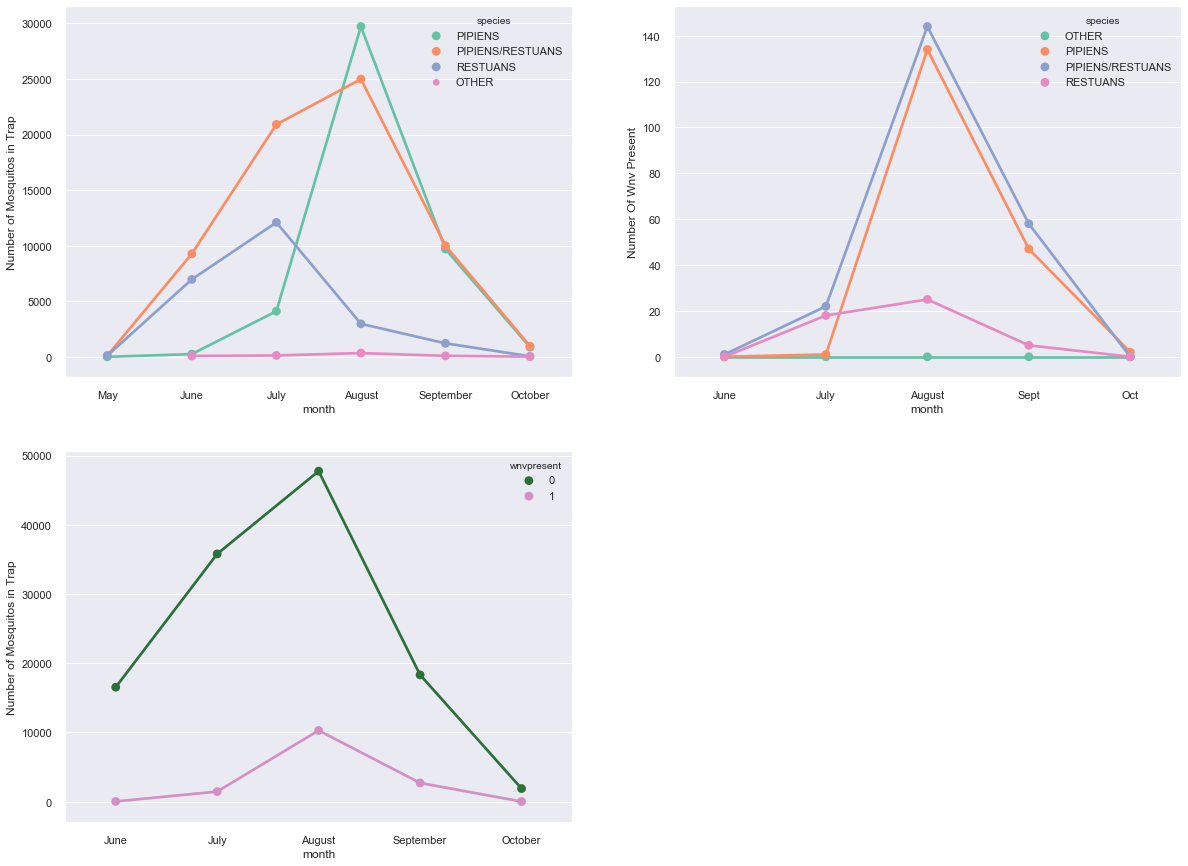

In [61]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(20,15))
axes = axes.ravel()

# tot_mos_species vs month on species 
sns.pointplot(x='month',y='tot_mos_species',hue = 'species', 
              data = train[~train['species'].isin(['others'])].groupby(['month','species'], as_index=False)['tot_mos_species'].sum(),palette='Set2',ax=axes[0])

axes[0].set(xticklabels=['May', 'June', 'July', 'August', 'September', 'October'])
axes[0].set_ylabel('Number of Mosquitos in Trap')

# Number Of Wnv Present vs month on species
sns.pointplot(x='month',y='wnvpresent',hue ='species', 
              data = train[~train['month'].isin(['05'])].groupby(['month','species'], as_index=False)['wnvpresent'].sum(),palette='Set2',ax=axes[1])

axes[1].set(xticklabels=['June','July','August','Sept',"Oct"])
axes[1].set_ylabel('Number Of Wnv Present')

# tot_mos_species vs month on wnvpresent
sns.pointplot(x='month',y='tot_mos_species',hue ='wnvpresent', 
              data = train[~train['month'].isin(['05'])].groupby(['month','wnvpresent'], as_index=False)['tot_mos_species'].sum(),palette='cubehelix',ax=axes[2])

axes[2].set(xticklabels=['June', 'July', 'August', 'September', 'October'])
axes[2].set_ylabel('Number of Mosquitos in Trap')


axes[3].axis('off')

plt.show()

Observaton:

    1) incrememnt in wnvpresent starts from june, peaks in august and starts to decrease in september onwards
    2) in terms of species, pipiens and pipiens/restuans are the 2 major species that contribute to wnvpresent 

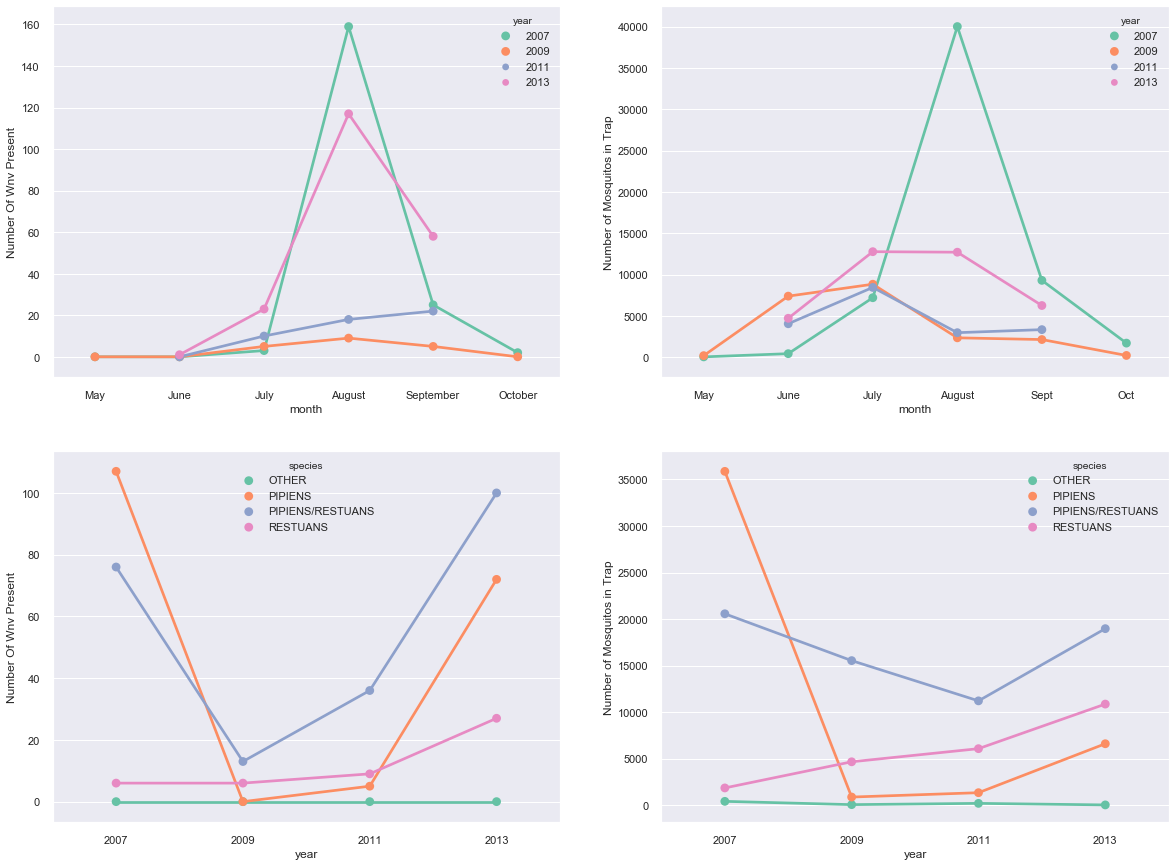

In [62]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(20,15))
axes = axes.ravel()

# trend of wnvpresent across the months
sns.pointplot(x='month',y='wnvpresent',hue = 'year', 
              data = train[~train['species'].isin(['others'])].groupby(['year','month'], as_index=False)['wnvpresent'].sum(),palette='Set2',ax=axes[0])

axes[0].set(xticklabels=['May','June','July', 'August', 'September', 'October'])
axes[0].set_ylabel('Number Of Wnv Present')


# trend of no. of mosquito in trap across the months 
sns.pointplot(x='month',y='tot_mos_species',hue ='year', 
              data = train[~train['species'].isin(['others'])].groupby(['month','year'], as_index=False)['tot_mos_species'].sum(),palette='Set2',ax=axes[1])

axes[1].set(xticklabels=['May','June','July','August','Sept',"Oct"])
axes[1].set_ylabel('Number of Mosquitos in Trap')


# ltrend of no. of wnvpresent vs year per species 
sns.pointplot(x='year',y='wnvpresent',hue ='species', 
              data = train.groupby(['year','species'], as_index=False)['wnvpresent'].sum(),palette='Set2',ax=axes[2])

axes[2].set(xticklabels=['2007','2009','2011','2013'])
axes[2].set_ylabel('Number Of Wnv Present')


# trend of no. of mosquito in trap vs year per species
sns.pointplot(x='year',y='tot_mos_species',hue ='species', 
              data = train.groupby(['year','species'], as_index=False)['tot_mos_species'].sum(),palette='Set2',ax=axes[3])

axes[3].set(xticklabels=['2007','2009','2011','2013'])
axes[3].set_ylabel('Number of Mosquitos in Trap')

plt.show()

# Feature Engineering

In [63]:
train_get_dum = pd.get_dummies(data=train, prefix=['species'],columns=['species'],drop_first=True)

In [64]:
train_get_dum.head(2)

,date,trap,latitude,longitude,nummosquitos,wnvpresent,year,month,day,tot_mos_species,species_PIPIENS,species_PIPIENS/RESTUANS,species_RESTUANS
0,2007-05-29,T002,41.95469,-87.800991,1,0,2007,05,29,1,0,1,0
1,2007-05-29,T002,41.95469,-87.800991,1,0,2007,05,29,1,0,0,1


In [65]:
train_get_dum.shape

(8596, 13)

In [66]:
train_get_dum[train_get_dum.duplicated()].shape

(0, 13)

----------------------------------

# Test Dataset

In [67]:
test[test.duplicated()].shape

(0, 11)

In [68]:
test.columns = test.columns.map(lambda x: x.lower())

In [69]:
test.columns

Index(['id', 'date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy'],
      dtype='object')

In [70]:
test.dtypes

id                          int64
date                       object
address                    object
species                    object
block                       int64
street                     object
trap                       object
addressnumberandstreet     object
latitude                  float64
longitude                 float64
addressaccuracy             int64
dtype: object

### Date

In [71]:
test['date']

0         2008-06-11
1         2008-06-11
2         2008-06-11
3         2008-06-11
4         2008-06-11
             ...    
116288    2014-10-02
116289    2014-10-02
116290    2014-10-02
116291    2014-10-02
116292    2014-10-02
Name: date, Length: 116293, dtype: object

In [72]:
test['date_split'] = test['date'].str.split('-')
test['date_split']

0         [2008, 06, 11]
1         [2008, 06, 11]
2         [2008, 06, 11]
3         [2008, 06, 11]
4         [2008, 06, 11]
               ...      
116288    [2014, 10, 02]
116289    [2014, 10, 02]
116290    [2014, 10, 02]
116291    [2014, 10, 02]
116292    [2014, 10, 02]
Name: date_split, Length: 116293, dtype: object

In [73]:
test['year'] = [y[0] for y in test['date_split']]
test['year']

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
116288    2014
116289    2014
116290    2014
116291    2014
116292    2014
Name: year, Length: 116293, dtype: object

In [74]:
test['month'] = [y[1] for y in test['date_split']]
test['month']

0         06
1         06
2         06
3         06
4         06
          ..
116288    10
116289    10
116290    10
116291    10
116292    10
Name: month, Length: 116293, dtype: object

In [75]:
test['day'] = [y[2] for y in test['date_split']]
test['day']

0         11
1         11
2         11
3         11
4         11
          ..
116288    02
116289    02
116290    02
116291    02
116292    02
Name: day, Length: 116293, dtype: object

In [76]:
test.drop(columns = 'date_split',inplace = True)

In [77]:
test.columns

Index(['id', 'date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'year', 'month', 'day'],
      dtype='object')

### Species

In [78]:
test['species'].value_counts()

CULEX PIPIENS/RESTUANS    15359
CULEX RESTUANS            14670
CULEX PIPIENS             14521
CULEX SALINARIUS          14355
CULEX TERRITANS           14351
CULEX TARSALIS            14347
UNSPECIFIED CULEX         14345
CULEX ERRATICUS           14345
Name: species, dtype: int64

In [79]:
test.species = test.species.map({'CULEX PIPIENS/RESTUANS': 'PIPIENS/RESTUANS',
                                   'CULEX RESTUANS': 'RESTUANS',
                                   'CULEX PIPIENS': 'PIPIENS',
                                   'CULEX TERRITANS': 'OTHER', 
                                   'CULEX SALINARIUS': 'OTHER',
                                   'CULEX TARSALIS': 'OTHER',
                                   'CULEX ERRATICUS': 'OTHER',
                                   'UNSPECIFIED CULEX': 'OTHER'})

In [80]:
test['species'].value_counts()

OTHER               71743
PIPIENS/RESTUANS    15359
RESTUANS            14670
PIPIENS             14521
Name: species, dtype: int64

In [81]:
test.columns

Index(['id', 'date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'year', 'month', 'day'],
      dtype='object')

### Block, address, street, addressnumberandstreet, addressaccuracy

Dropping block, address, street, addressnumberandstreet & addressaccuracy since we did it to the train dataset

In [82]:
test.drop(columns = 'block',inplace = True)
test.drop(columns = 'address',inplace = True)
test.drop(columns = 'street',inplace = True)
test.drop(columns = 'addressnumberandstreet',inplace = True)
test.drop(columns = 'addressaccuracy',inplace = True)

### Trap

In [83]:
train.trap.value_counts()

T900    181
T115    156
T135    153
T002    150
T151    144
       ... 
T238      7
T078      6
T076      5
T237      3
T040      2
Name: trap, Length: 134, dtype: int64

In [84]:
test.trap.unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

In [85]:
#convert all satellite trap to have the same trap name as parent trap
trap_rename = lambda x: x[0:4] if len(x)==5 else x
test['trap'] = test['trap'].apply(trap_rename)

In [86]:
test.trap.unique()

array(['T002', 'T007', 'T015', 'T045', 'T046', 'T048', 'T049', 'T050',
       'T054', 'T086', 'T091', 'T094', 'T096', 'T129', 'T143', 'T148',
       'T153', 'T159', 'T009', 'T011', 'T016', 'T019', 'T025', 'T028',
       'T031', 'T033', 'T089', 'T090', 'T092', 'T135', 'T141', 'T142',
       'T145', 'T146', 'T147', 'T149', 'T150', 'T151', 'T152', 'T154',
       'T158', 'T162', 'T218', 'T220', 'T001', 'T003', 'T006', 'T008',
       'T012', 'T034', 'T037', 'T040', 'T043', 'T047', 'T051', 'T085',
       'T088', 'T161', 'T219', 'T013', 'T014', 'T018', 'T030', 'T084',
       'T144', 'T160', 'T005', 'T017', 'T044', 'T095', 'T004', 'T035',
       'T036', 'T039', 'T060', 'T061', 'T062', 'T065', 'T066', 'T067',
       'T069', 'T070', 'T071', 'T073', 'T074', 'T075', 'T076', 'T077',
       'T079', 'T080', 'T081', 'T082', 'T083', 'T114', 'T155', 'T063',
       'T115', 'T138', 'T200', 'T206', 'T209', 'T212', 'T215', 'T107',
       'T128', 'T072', 'T078', 'T097', 'T099', 'T100', 'T102', 'T103',
      

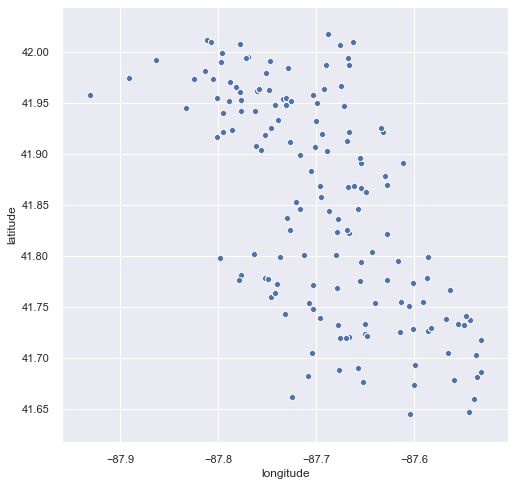

In [87]:
X= test['longitude']
y = test['latitude']

plt.figure(figsize=(8,8))
sns.scatterplot(X,y)

# Feature engineering 

In [88]:
test_get_dum = pd.get_dummies(data=test, prefix=['species'],columns=['species'],drop_first=True)

In [89]:
test_get_dum

,id,date,trap,latitude,longitude,year,month,day,species_PIPIENS,species_PIPIENS/RESTUANS,species_RESTUANS
0,1,2008-06-11,T002,41.954690,-87.800991,2008,06,11,0,1,0
1,2,2008-06-11,T002,41.954690,-87.800991,2008,06,11,0,0,1
2,3,2008-06-11,T002,41.954690,-87.800991,2008,06,11,1,0,0
3,4,2008-06-11,T002,41.954690,-87.800991,2008,06,11,0,0,0
4,5,2008-06-11,T002,41.954690,-87.800991,2008,06,11,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
116288,116289,2014-10-02,T054,41.925652,-87.633590,2014,10,02,0,0,0
116289,116290,2014-10-02,T054,41.925652,-87.633590,2014,10,02,0,0,0
116290,116291,2014-10-02,T054,41.925652,-87.633590,2014,10,02,0,0,0
116291,116292,2014-10-02,T054,41.925652,-87.633590,2014,10,02,0,0,0


In [90]:
test_get_dum[test_get_dum.duplicated()].shape

(0, 11)

--------------------------------

# Spray

| Feature                | File  | Description                                                                                                 |
|------------------------|-------|-------------------------------------------------------------------------------------------------------------|
| Date                   | Spray | date that the WNV test is performed|
| Time                   | Spray |                        |        
| Latitude               | Spray | the species of mosquitos|
| Longitude              | Spray | block number of address                                                       


In [91]:
spray.columns = spray.columns.map(lambda x: x.lower())

In [92]:
spray.columns

Index(['date', 'time', 'latitude', 'longitude'], dtype='object')

In [93]:
spray.shape

(14835, 4)

In [94]:
spray.isnull().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

In [95]:
spray.head()

,date,time,latitude,longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


Generally, We can see that there are multiple entries for a single day

In [96]:
spray[spray.duplicated()].shape

(541, 4)

There are 541 duplicates observations, we need to investigate them throughtly to make decisions on how to handle them

### Longitude & Latitude

In [97]:
spray_duplicates = spray.groupby(['latitude', 'longitude'], as_index=False).count().sort_values('date', ascending=False)
spray_duplicates

,latitude,longitude,date,time
11853,41.986460,-87.794225,541,541
11499,41.983917,-87.793088,2,2
0,41.713925,-87.615892,1,1
9533,41.959113,-87.719752,1,1
9522,41.959028,-87.728890,1,1
...,...,...,...,...
4767,41.894337,-87.714500,1,1
4768,41.894343,-87.760688,1,1
4769,41.894380,-87.772148,1,1
4770,41.894402,-87.704128,1,1


it seems that there is 540 duplicates and 1 duplicate (while retaining 1 original data) 

After investigating, the duplicates are suspected to be error in data entry as it makes no logical sense why there are multiple entries of the same data and time of the spray done at the same location. hence, dropping the 540 & 1 duplicates

In [98]:
spray[spray.duplicated()].shape

(541, 4)

In [99]:
# keeping one entry and removing the remaining 540 and 1 duplicate
spray = spray[spray.duplicated(subset=['date','latitude','longitude','time'])==False]
spray.shape

(14294, 4)

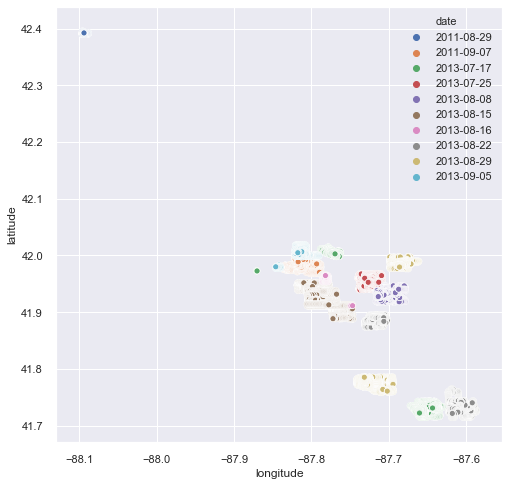

In [100]:
X= spray['longitude']
y = spray['latitude']

plt.figure(figsize=(8,8))
sns.scatterplot(X,y,hue=spray['date'])

### Time

In [101]:
spray.drop('time', axis=1, inplace=True)

### Date

In [102]:
print(np.unique(spray['date']))
spray['date'].value_counts()

['2011-08-29' '2011-09-07' '2013-07-17' '2013-07-25' '2013-08-08'
 '2013-08-15' '2013-08-16' '2013-08-22' '2013-08-29' '2013-09-05']


2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2013-07-25    1607
2013-08-22    1587
2011-09-07    1573
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: date, dtype: int64

Spray was done on 2 days in 2011 and 8 days in 2013

In [103]:
spray['date']

0        2011-08-29
1        2011-08-29
2        2011-08-29
3        2011-08-29
4        2011-08-29
            ...    
14830    2013-09-05
14831    2013-09-05
14832    2013-09-05
14833    2013-09-05
14834    2013-09-05
Name: date, Length: 14294, dtype: object

In [104]:
spray['date_split'] = spray['date'].str.split('-')
spray['date_split']

0        [2011, 08, 29]
1        [2011, 08, 29]
2        [2011, 08, 29]
3        [2011, 08, 29]
4        [2011, 08, 29]
              ...      
14830    [2013, 09, 05]
14831    [2013, 09, 05]
14832    [2013, 09, 05]
14833    [2013, 09, 05]
14834    [2013, 09, 05]
Name: date_split, Length: 14294, dtype: object

In [105]:
spray['year'] = [y[0] for y in spray['date_split']]
spray['year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
14830    2013
14831    2013
14832    2013
14833    2013
14834    2013
Name: year, Length: 14294, dtype: object

In [106]:
spray['month'] = [y[1] for y in spray['date_split']]
spray['month']

0        08
1        08
2        08
3        08
4        08
         ..
14830    09
14831    09
14832    09
14833    09
14834    09
Name: month, Length: 14294, dtype: object

In [107]:
spray['day'] = [y[2] for y in spray['date_split']]
spray['day']

0        29
1        29
2        29
3        29
4        29
         ..
14830    05
14831    05
14832    05
14833    05
14834    05
Name: day, Length: 14294, dtype: object

In [108]:
spray.drop(columns = 'date_split',inplace = True)

In [109]:
spray.columns

Index(['date', 'latitude', 'longitude', 'year', 'month', 'day'], dtype='object')

In [110]:
spray.head()

,date,latitude,longitude,year,month,day
0,2011-08-29,42.391623,-88.089163,2011,08,29
1,2011-08-29,42.391348,-88.089163,2011,08,29
2,2011-08-29,42.391022,-88.089157,2011,08,29
3,2011-08-29,42.390637,-88.089158,2011,08,29
4,2011-08-29,42.390410,-88.088858,2011,08,29


-------------

# Exporting cleaned files

In [111]:
train_get_dum.to_csv('./data/train_cleaned.csv', index=False)

In [112]:
test_get_dum.to_csv('./data/test_cleaned.csv', index=False)

In [113]:
spray.to_csv('./data/spray_cleaned.csv', index=False)